In [1]:
#  The code starts by importing the necessary libraries.
#  numpy is used to perform mathematical operations on arrays of data, pandas is used for data analysis and manipulation, os is used for system calls and file I/O, cv2 is used for video processing, matplotlib is used for plotting images and graphs, tf is a library that provides support for deep learning models, keras is a library that allows you to build neural networks in Python, ImageDataGenerator converts images into numerical values, and Adam optimizes the Neural Network model.
#  Next, the code creates a new instance of TF object.
#  This object will be used to train and evaluate a Neural Network model.
#  The first step in training the Neural Network model involves loading some pre-trained weights from TF into the network.
#  These weights were obtained from a previous training session on another machine using TensorFlow's load_weights() function.
#  Next, the network is initialized with some random values provided by np.random .
#  Finally, accuracy_score() function is called to measure how well the network has performed so far.
#  The next block of code splits the input image into 8x8 pixel blocks and trains two different versions of a Neural Network model: one with 100 layers and
#  The code will create a TensorFlow session, install the necessary dependencies, and initialize a keras model.
#  The code will also create an ImageDataGenerator object to generate images for training and testing.
#  Finally, the code will load the fivethirtyeight style and enable plotting of graphs.
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


from matplotlib import style
style.use('fivethirtyeight')

c:\Users\Sisir\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#  The code first sets up some basic environment variables.
#  The data_dir variable stores the path to the directory where the training and test datasets will be stored.
#  The train_path variable stores the path to the directory where the training dataset will be stored.
#  The test_path variable stores the path to the directory where the test dataset will be stored.
#  Next, in order to load both of these datasets into memory, a for loop is used to iterate over each file in each of these directories.
#  For each file, an image is loaded into memory using ImageMagick’s imread() function.
#  Next, a size parameter is set equal to 30x30x3 , which specifies that each image should be 30 pixels wide by 30 pixels high by 3 pixels thick.
#  Finally, channels is set equal to 3 , which indicates that this image should be converted into three color channels ( red , green , and blue ).
#  After loading all of the images into memory, a series of convolutional neural networks are created using TensorFlow’s conv2d() and maxPooling2d() functions.
#  These two functions take as input an array of float values and produce an output array containing only those values that are larger than zero
#  The code sets up the necessary folders and files for training and testing a deep learning model.
#  The train_path will contain all of the data used to train the model, while the test_path will contain all of the data used to test the model.
#  The next line specifies that each image should be 30x30x3 pixels in size.
#  This will ensure that each image is large enough to capture all of the relevant data, but not so large as to slow down the training process.
#  Finally, the code defines which channels should be used for training and testing the model.
#  By default, deep learning models are typically trained using multiple channels (i.e., layers).
#  However, it is possible to train a single channel deep learning model
data_dir = r"C:\Users\Sisir\Desktop\ARCHIVE"
train_path = r"C:\Users\Sisir\Desktop\ARCHIVE\Train"
test_path = r"C:\Users\Sisir\Desktop\ARCHIVE\Test"
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
#  The code will return the number of categories in the directory train_path.
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
#declares all the class labels
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

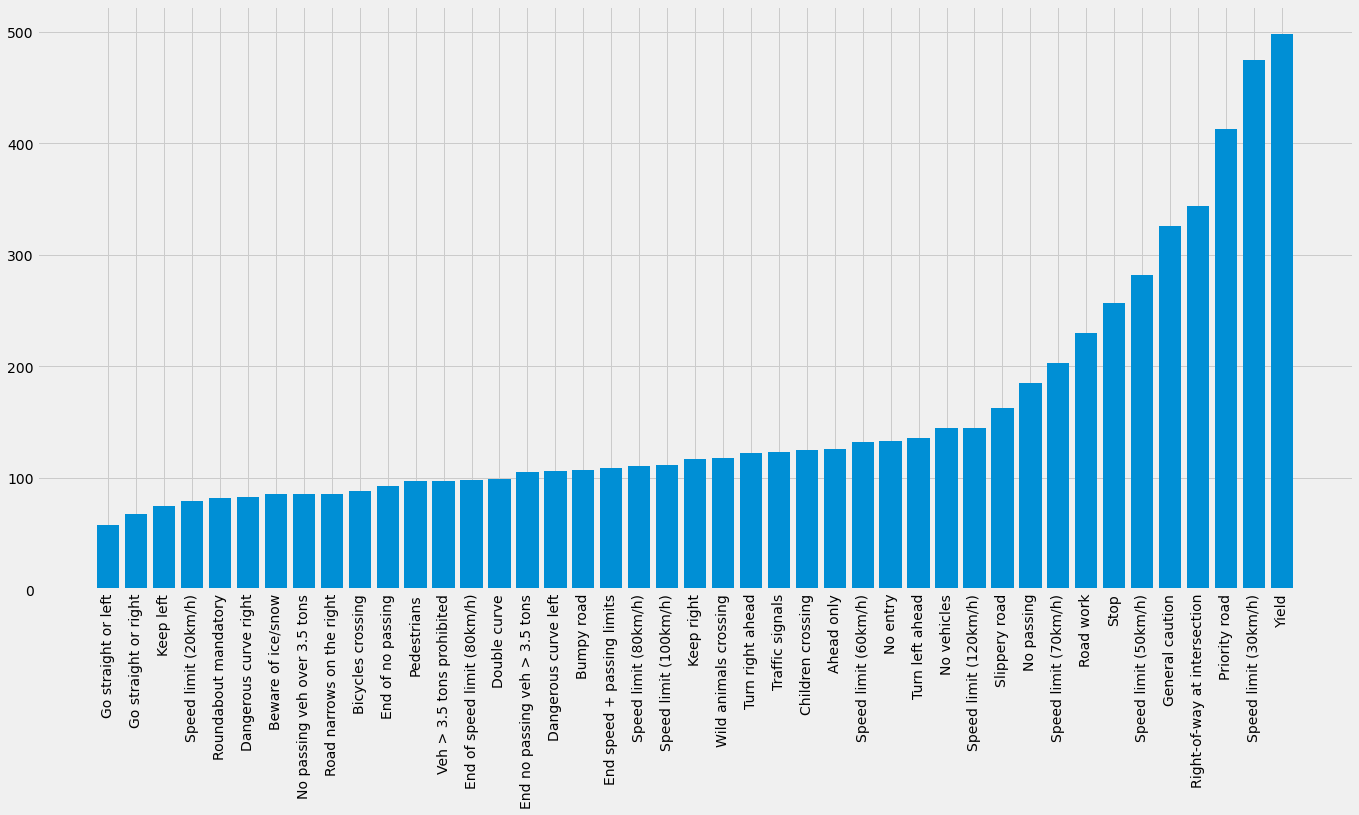

In [5]:
#  The code first lists the folders in the train_path.
#  It then creates a list of lists, zipped_lists, containing the number of images in each class.
#  The sorted_pairs list contains pairs of numbers, one for each class.
#  Finally, the train_number and class_num lists are created from these pairs.
#  The code then plots the number of images in each class on a figure and bar graph.
#  The x-axis shows the class number and the y-axis shows the number of images in that class.
#  The ticks on the graph show where those numbers were taken from: at column 1 (the first row) for classes 1 through 10, and at column 2 (the second row) for classes 11 through 20.
#  The code first lists all the folders in the train_path.
#  It then iterates over each folder and fetches all the files inside it.
#  Next, it counts the number of files in each category and stores this information in a list called train_number.
#  Finally, it sorts the list of train_number by class_num and plots these numbers on a bar graph.
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

C:\Users\Sisir\AppData\Local\Temp\ipykernel_14648\2093157581.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


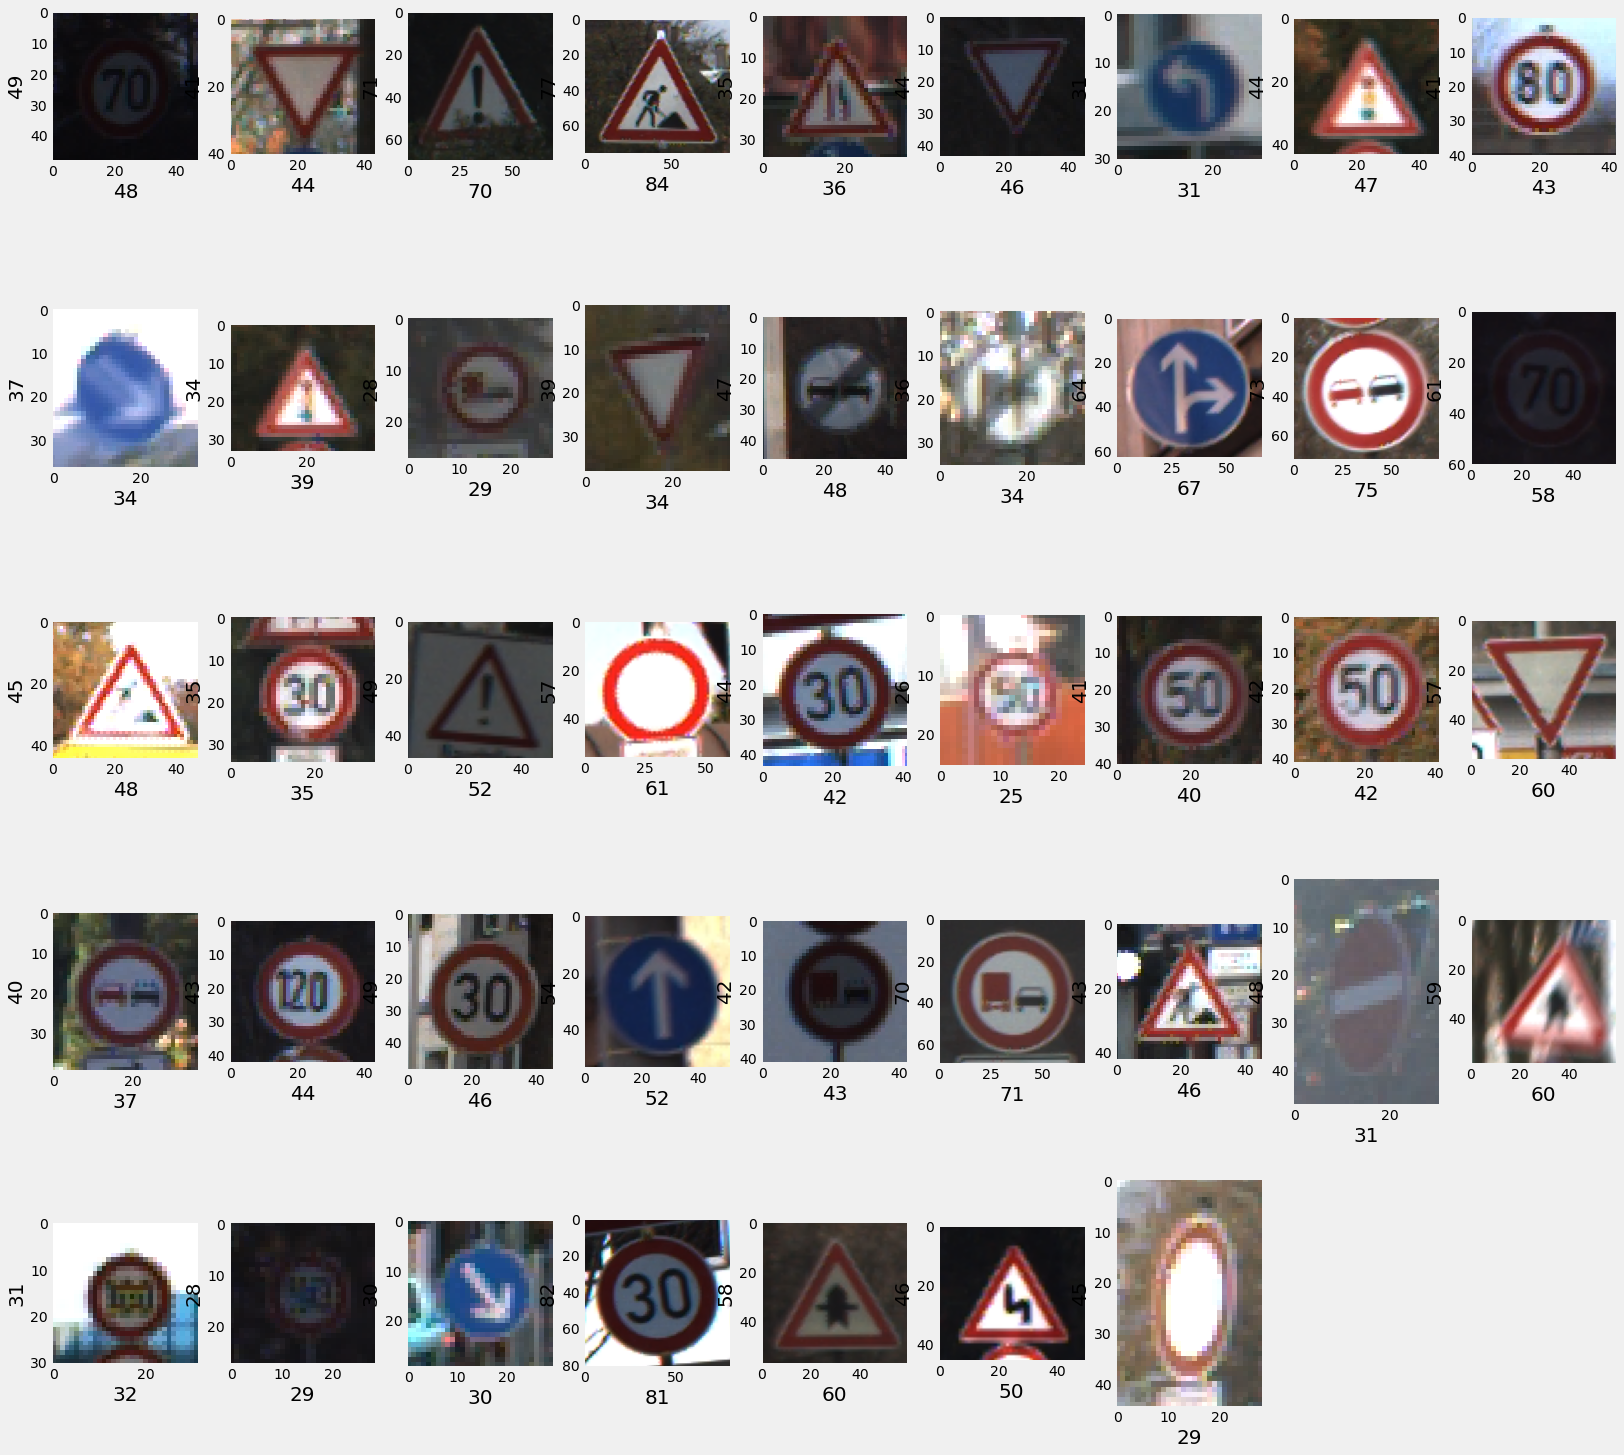

In [6]:
# Visualizing 25 random images from test data
#  The code imports the matplotlib module and creates a figure object.
#  The figsize parameter sets the size of the figure.
#  The for loop iterates over the 44 test images.
#  For each image, it creates a subplot with a width of 25 pixels and height of 25 pixels.
#  It then loads in a random image from the data directory and displays it onscreen.
#  Next, the code defines two labels for the plot: one for the width of the image (in pixels) and another for its height (in pixels).
#  The code will generate a figure that displays the images contained in the Test.csv file.
#  The figure will have five subplots, each with nine rows and one column.
#  The first row of each subplot will contain the pathnames of the images, while the remaining rows will contain random values generated by the random module.
#  Finally, the figure's title and labels will be set to match those of the images
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,44):
    plt.subplot(5,9,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [7]:
#  The code first imports the necessary libraries.
#  It then creates a list of images, one for each category.
#  For each image, it reads the file and converts it to an array.
#  Next, it resize the image to be 160x120 pixels.
#  Finally, it saves the data in an numpy array and prints out its size.
#  The code will create an numpy array of shape (NUM_CATEGORIES, NUM_CATEGORIES) containing the images from the Train directory.
#  The image_data will have the dimensions (IMG_HEIGHT, IMG_WIDTH), while image_labels will have the same dimensions as image_fromarray.
#  If there is an error while trying to read an image from the Train directory, a message will be printed and the code will terminate without reading any images.
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(6723, 30, 30, 3) (6723,)


In [8]:
#  The code first creates an array of integers, shuffle_indexes, that will be used to randomly select a subset of the image data.
#  Next, the code randomly selects a subset of the image data and stores it in image_data.
#  Finally, the code creates an array of strings, image_labels, that contains the labels for each pixel in the selected subset of image data.
#  The code will randomly shuffle the indexes of the image data.
#  This is done so that each image in the dataset will be assigned a different index.
#  Next, the image data itself is shuffled and used as input to the image labels function.
# to randomize the data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [9]:
#  The code first creates a training set of images and labels.
#  The size of the training set is set to 0.3, which means that 30 percent of the images in the data set will be used for training, and 70 percent will be used for testing.
#  Next, the code randomly selects 42 images from the training set and stores them in a new variable called X_train.
#  The code then creates a new variable called y_train, which holds the predictions made by the neural network on the test data using the trained model.
#  The y_train variable has shape (255, 1) because it contains 255 values (one for each image in the training set) and 1 as its dimensionality (meaning that y_train has one column).
#  The code next creates a new variable called y_val, which holds the predictions made by the neural network on the test data using the un-trained model.
#  The y_val variable has shape (255, 0) because it contains only zero values (zero for each image in the data set).
#  The code splits the image data into a training set and a testing set.
#  The training set is used to train the model, while the testing set is used to evaluate the model.
#  Finally, the code prints out information about the shape of each dataset.
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (4706, 30, 30, 3)
X_valid.shape (2017, 30, 30, 3)
y_train.shape (4706,)
y_valid.shape (2017,)


In [10]:
#  The code creates two arrays, y_train and y_val.
#  The y_train array has shape (n_samples, n_features).
#  The y_val array has shape (n_samples, 1).
#  The code first creates a categorical representation of the input data using the to_categorical() function.
#  This function takes in an input vector of floating point values and produces an integer vector that represents the category for each value in the vector.
#  In this case, the input data is represented as a sequence of numbers, so each number in the sequence corresponds to a category.
#  Next, the code creates an integer representation of the input data using the to_integer() function.
#  This function takes in a vector of floating point values and produces an integer value that represents that category for each value in the vector.
#  In this case, every number in y_val corresponds to a single category.
#  The code will create two arrays, y_train and y_val.
#  The first array will have the shape of (n_samples, n_features).
#  The second array will have the shape of (n_samples, 1).
#  The code will use the to_categorical function to convert each element in y_train into a categorical variable.
#  The to_categorical function takes two arguments: the input data matrix and the number of categories.
#  In this case, y_train will be converted into a categorical variable with two categories: training data and validation data.
#  Similarly, y_val will be converted into a categorical variable with one category: validation data.
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(4706, 43)
(2017, 43)


In [11]:
#  The code first creates a Sequential model, which has three layers: a Conv2D layer with filters of 16, 32, and 64; a MaxPool2D layer with pool_size of 2 and 2 neurons per batch; and a BatchNormalization layer.
#  Next, the code creates two more layers: a Conv2D layer with filters of 128 and 256; and a MaxPool2D layer with pool_size of 4.
#  The Conv2D layer has activation='relu' while the MaxPool2D layer has activation='relu' and pool_size=4.
#  The last two layers are created: a Flattenlayer to flatten the input data into one dimension; and an Denselayer with 512 neurons and activation='relu'.
#  Finally, the Dropoutlayer is applied to reduce noise in the network.
#  The code will create a model that is composed of 4 sequential layers: 1.
#  A Conv2D layer with filters of 16, which will be used to upscale the input images to 3x3 size.
#  2.
#  A Conv2D layer with filters of 32, which will be used to downscale the input images to 1x1 size.
#  3.
#  A MaxPool2D layer with pool_size of 2, which will be used to combine the output from the Conv2D and Conv2D layers into a single 2x2 matrix.
#  4.
#  A BatchNormalization layer, which will normalize the output from the MaxPool2D layer.
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [12]:
#  The code first creates an instance of the Adam algorithm.
#  The decay parameter controls how quickly the learning rate decreases as the epochs increase.
#  In this case, it is set to 0.5, which means that the learning rate will decrease by 50% every time an epoch is completed.
#  Next, the code sets up a loss function for the model.
#  The accuracy metric is used to measure how well the model performs on training data.
#  Finally, the code compiles and trains the model using Adam() .
#  The loss function measures the accuracy of the predictions, while the optimizer determines how much weight to give each input variable in order to maximize the prediction accuracy.
#  The metrics parameter can be set to either accuracy or precision, which gives you more information about how well your CNN performed.
lr = 0.01
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

c:\Users\Sisir\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
#  The code first imports the necessary libraries.
#  It then creates an instance of the ImageDataGenerator class.
#  The constructor sets the rotation_range, zoom_range, width_shift_range, height_shift_range, shear_range, and horizontal_flip properties to 10, 0.15, 0.1, False, and False respectively.
#  The last two properties determine whether the image will be flipped horizontally and vertically.
#  The next line creates a history object that stores all of the training data (X train ) and validation data (Y val ).
#  The fit() method is then called on the history object with three arguments: X train , y train , and batch size (32 in this case).
#  This method trains a model on all of the training data and evaluates it on the validation data.
#  After each epochs passes (i.e., after every 32 batches), the model is saved to disk as my_model.h5 .
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))
model.save("my_model.h5")

Epoch 1/30
148/148 [==============================] - 5s 26ms/step - loss: 3.9516 - accuracy: 0.1832 - val_loss: 5.0788 - val_accuracy: 0.2945
Epoch 2/30
148/148 [==============================] - 4s 25ms/step - loss: 2.3475 - accuracy: 0.3740 - val_loss: 11.9881 - val_accuracy: 0.0912
Epoch 3/30
148/148 [==============================] - 3s 22ms/step - loss: 1.9108 - accuracy: 0.4420 - val_loss: 3.8537 - val_accuracy: 0.4229
Epoch 4/30
148/148 [==============================] - 3s 23ms/step - loss: 1.4925 - accuracy: 0.5408 - val_loss: 0.8558 - val_accuracy: 0.7115
Epoch 5/30
148/148 [==============================] - 4s 24ms/step - loss: 1.0803 - accuracy: 0.6521 - val_loss: 0.4946 - val_accuracy: 0.8161
Epoch 6/30
148/148 [==============================] - 3s 23ms/step - loss: 0.8449 - accuracy: 0.7259 - val_loss: 0.3370 - val_accuracy: 0.8949
Epoch 7/30
148/148 [==============================] - 4s 24ms/step - loss: 0.6640 - accuracy: 0.7909 - val_loss: 0.2428 - val_accuracy: 0.933

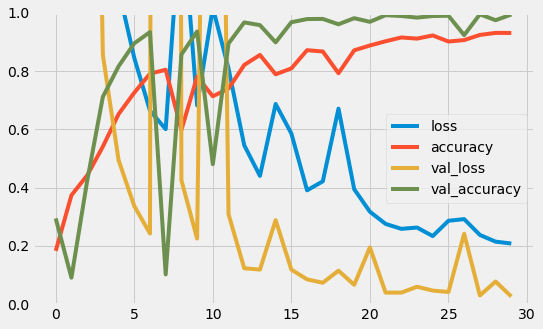

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

In [14]:
#  The code will produce a plot of the history data frame, with each point representing a time period.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
model.summary()

In [15]:
# The code reads a CSV file (Test.csv) using the pandas library, then it extracts the values of two columns
# "ClassId" (stored in the variable "labels") and "Path" (stored in the variable "imgs"). 
# The code then loops through each image path in "imgs", reads the image using OpenCV's "cv2.imread()"
# this function, resizes the image to a specific height and width using the Pillow library's "Image.fromarray()" and "resize()" functions
# it appends the resized image as an array to a list called "data". 
# The "data" list is then converted to a numpy array "X_test" and normalized by dividing by 255. 
# The code then predicts the class of the images using a pre-trained model's "predict()" function and returns the index of the highest predicted class probability using numpy's "argmax()" function.
#  Finally, the code calculates and prints the accuracy of the model's prediction compared to the true class labels.
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 2s 5ms/step
Test Data accuracy:  84.67933491686462


In [16]:
#we create the confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)


<AxesSubplot:>

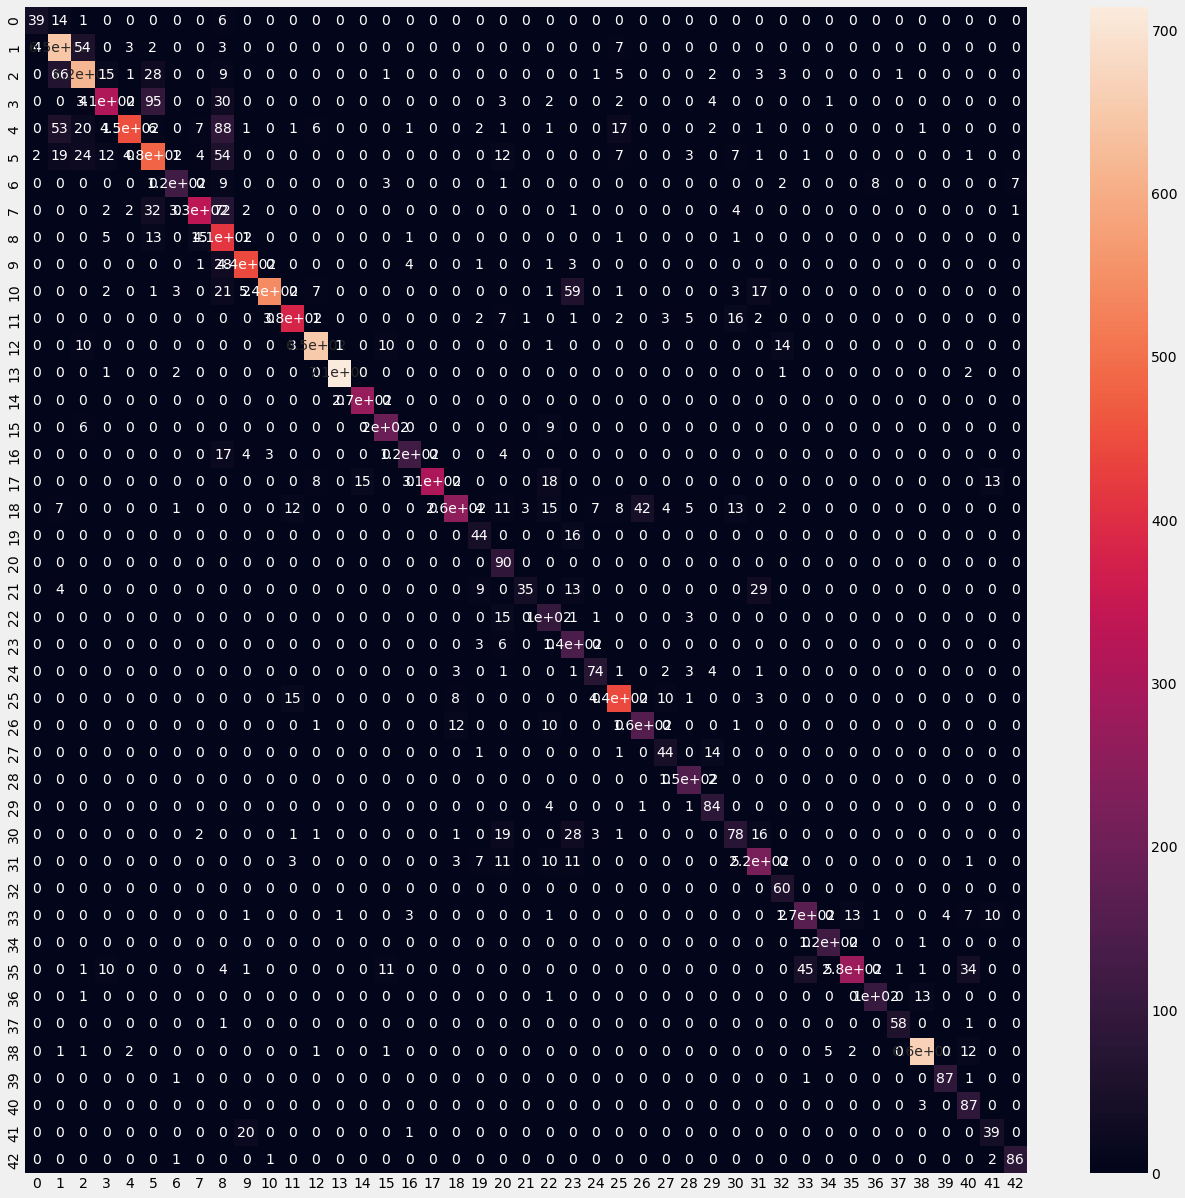

In [17]:
# we print the heatmap and understand the correlation
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

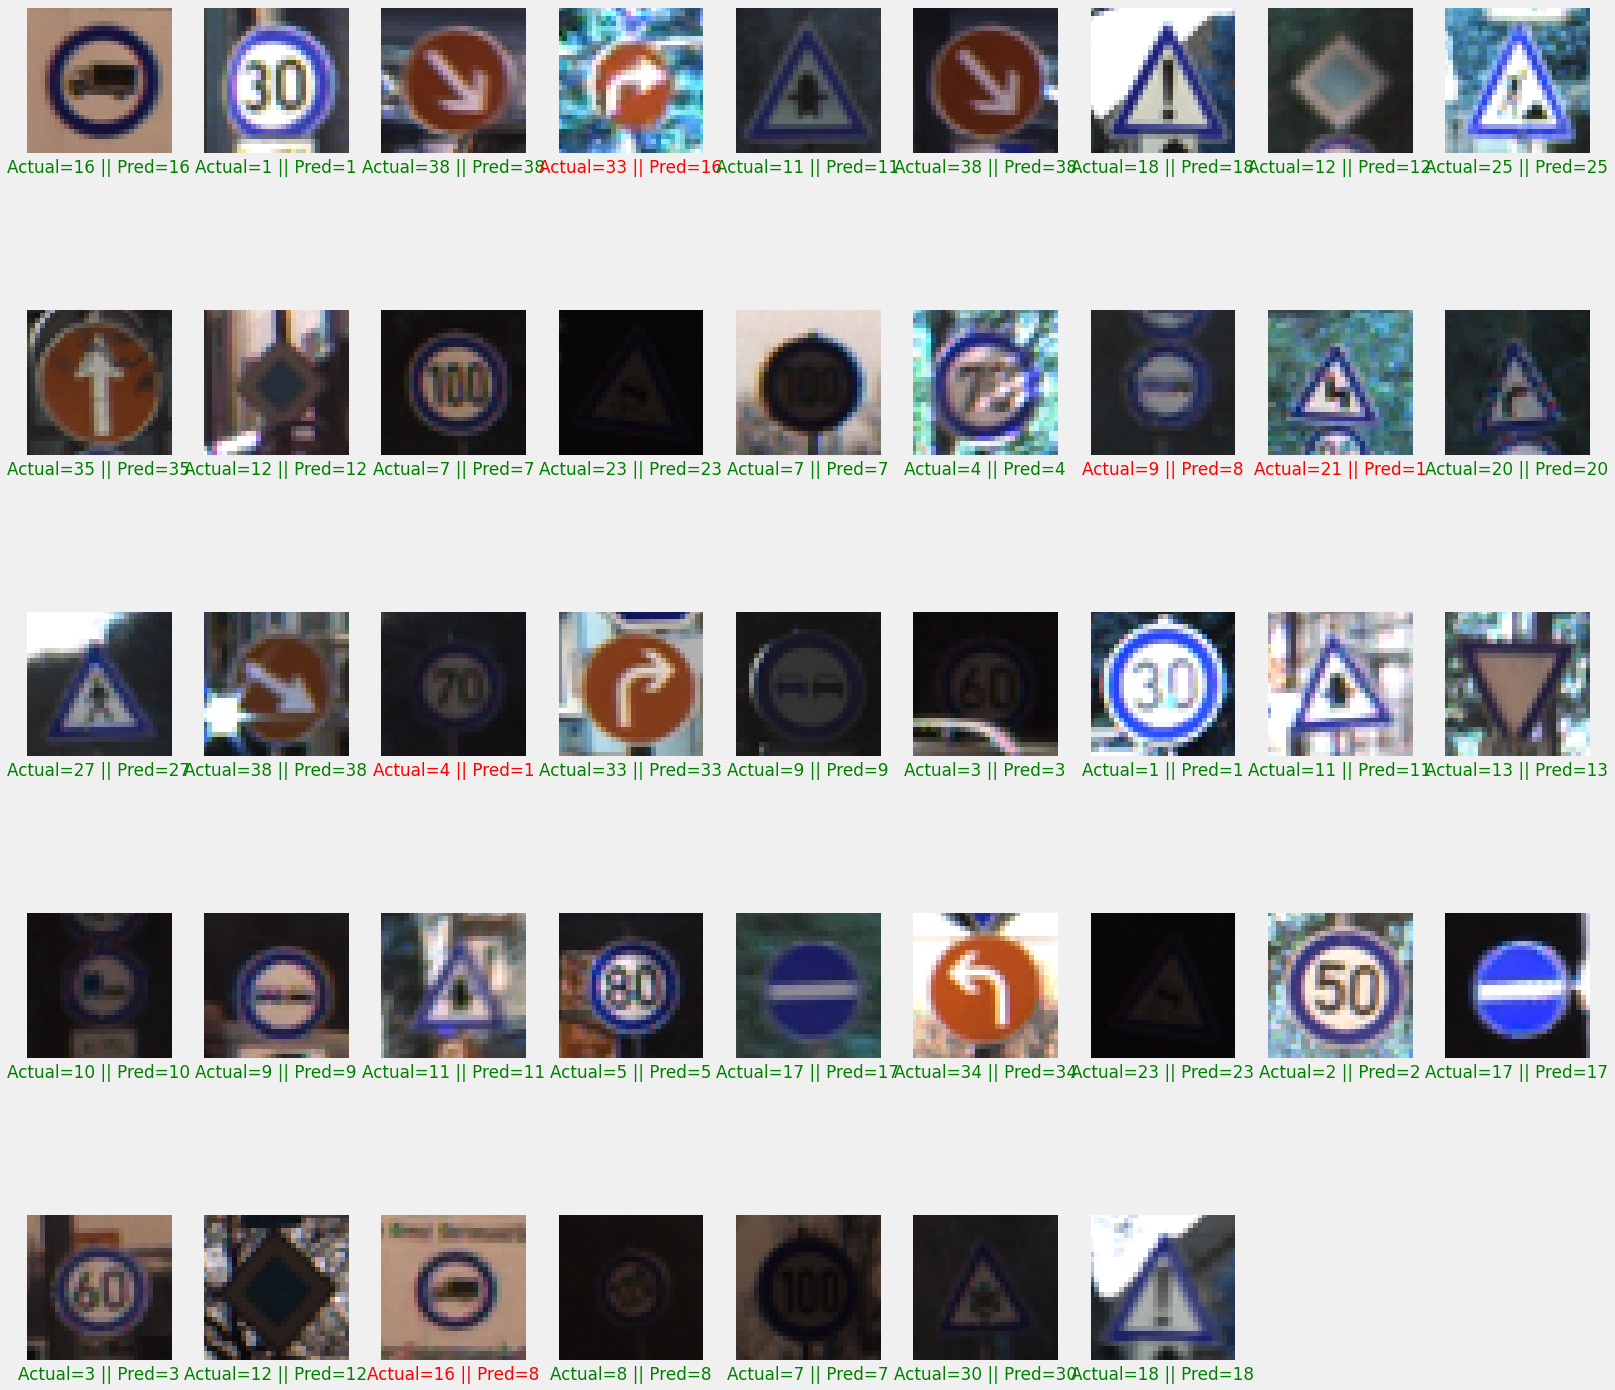

In [18]:
#we compare the real and perdicted values 
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(43):
    plt.subplot(5, 9, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [19]:
#we print the accuracy score
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74        60
           1       0.80      0.90      0.85       720
           2       0.83      0.82      0.83       750
           3       0.87      0.69      0.77       450
           4       0.98      0.68      0.81       660
           5       0.73      0.77      0.75       630
           6       0.93      0.80      0.86       150
           7       0.92      0.74      0.82       450
           8       0.55      0.92      0.69       450
           9       0.93      0.92      0.93       480
          10       0.99      0.82      0.90       660
          11       0.92      0.90      0.91       420
          12       0.96      0.94      0.95       690
          13       1.00      0.99      0.99       720
          14       0.95      1.00      0.97       270
          15       0.88      0.93      0.90       210
          16       0.92      0.81      0.87       150
          17       1.00    

In [20]:
model.save("my_model.h5")